In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import pickle

In [14]:
df=pd.read_csv(r"C:\Users\Hawiya\OneDrive\Desktop\IBM_INTERN_PROJ\adult.csv")

##DATA CLEANING AND ANALYSIS

In [15]:
df.shape

(32561, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
df.replace('?',np.nan,inplace=True)

In [23]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [21]:
df['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [25]:
df['workclass'] = df['workclass'].fillna('Private')

In [26]:
df['occupation'].describe()

count              30718
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [27]:
df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [28]:
df['native.country'].describe()

count             31978
unique               41
top       United-States
freq              29170
Name: native.country, dtype: object

In [29]:
df['native.country'] = df['native.country'].fillna('United-States')

In [30]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [31]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


##DATA VISUALIZATION

<Axes: xlabel='age', ylabel='Count'>

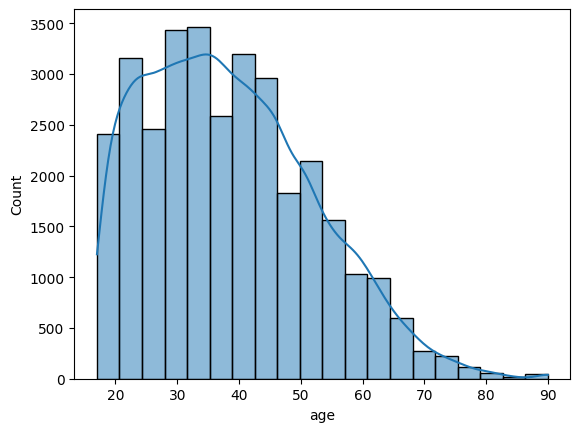

In [33]:
sns.histplot(data=df,x="age",bins=20,kde=True)

<Axes: xlabel='hours.per.week', ylabel='Count'>

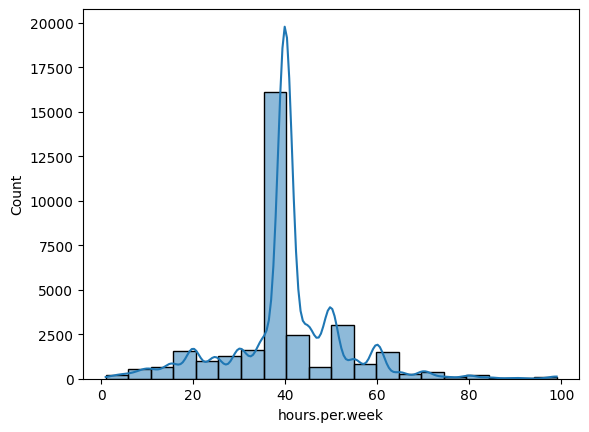

In [34]:
sns.histplot(data=df,x="hours.per.week",bins=20,kde=True)

In [35]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<Axes: xlabel='income', ylabel='count'>

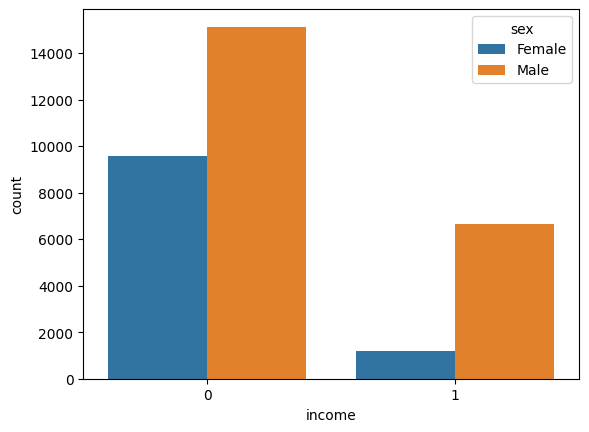

In [36]:
sns.countplot(x = 'income', hue = 'sex', data = df)

In [37]:
dataset=df.copy()

In [38]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='income', ylabel='count'>

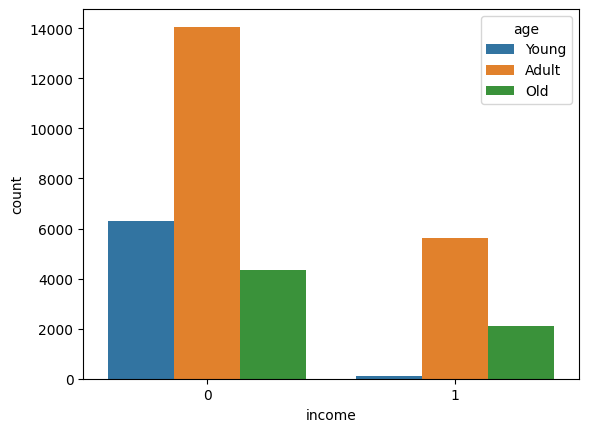

In [39]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

<Axes: xlabel='income', ylabel='count'>

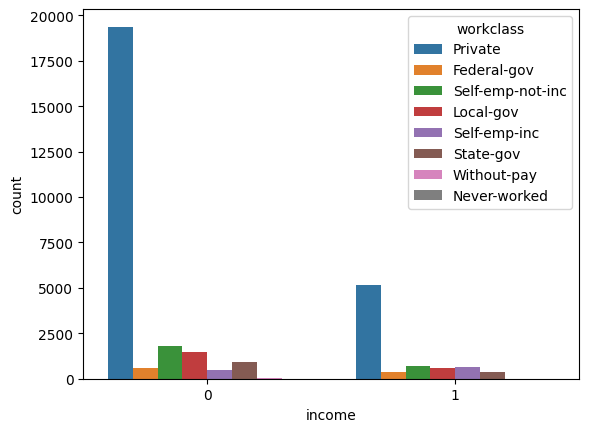

In [40]:
sns.countplot(x = 'income', hue = 'workclass', data = df)

<Axes: xlabel='income', ylabel='count'>

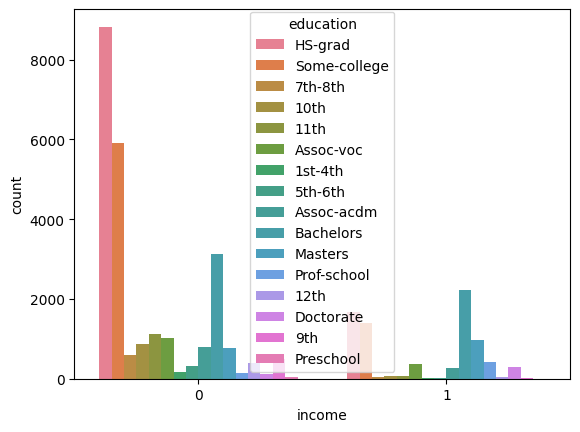

In [41]:
sns.countplot(x = 'income', hue = 'education', data = df)

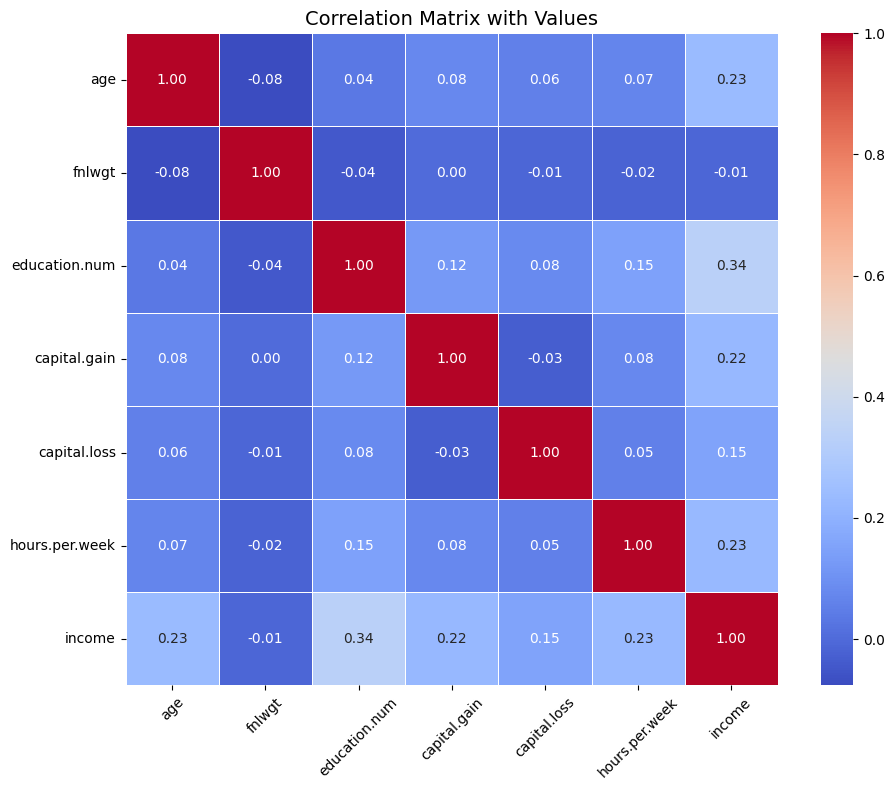

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap with correlation values annotated
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Matrix with Values", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [43]:
df.drop(['fnlwgt'], axis = 1, inplace = True)

<Axes: xlabel='income', ylabel='count'>

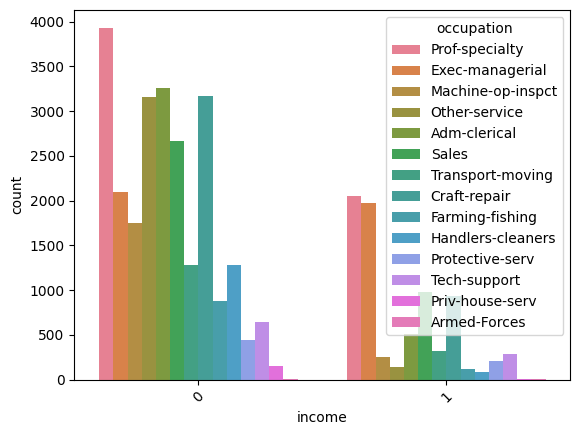

In [44]:
plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

##MODEL TRAINING

In [45]:
X = df.drop(['income'], axis=1)
Y = df['income']

In [46]:
X.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [47]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [49]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
encoders = {}  # Don't forget to initialize this

for feature in categorical:  # ✅ Use only one loop
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    encoders[feature] = le  # ✅ Store encoder properly


In [52]:
with open('encoders_salary.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("✅ Encoders saved for:", list(encoders.keys()))

✅ Encoders saved for: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [53]:
X_train.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,6,9,13,2,3,5,4,0,0,0,20,38
25206,39,1,11,9,2,6,0,4,1,0,0,38,38
23491,42,3,15,10,4,3,1,4,0,0,0,40,38
12367,27,1,11,9,4,4,3,4,1,0,0,40,38
7054,38,0,12,14,2,3,0,4,1,0,0,40,38


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [55]:
import pickle

# Save the scaler after fitting
with open("scaler_salary.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [56]:
#Applying the Logistic Regression algorithm
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.07

In [58]:
#Applying the GaussianNB algorithm
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.51

In [59]:
#Applying the random forest algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


98.07

In [62]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

89.65

In [63]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.6

In [64]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
98.07,Decision Tree
98.07,Random Forest
89.65,KNN
82.62,Logistic Regression
82.60,Support Vector Machines
80.51,Naive Bayes


In [65]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.209
capital.gain,0.127
relationship,0.121
hours.per.week,0.111
education.num,0.102
occupation,0.086
marital.status,0.072
workclass,0.048
capital.loss,0.039


<Axes: xlabel='feature'>

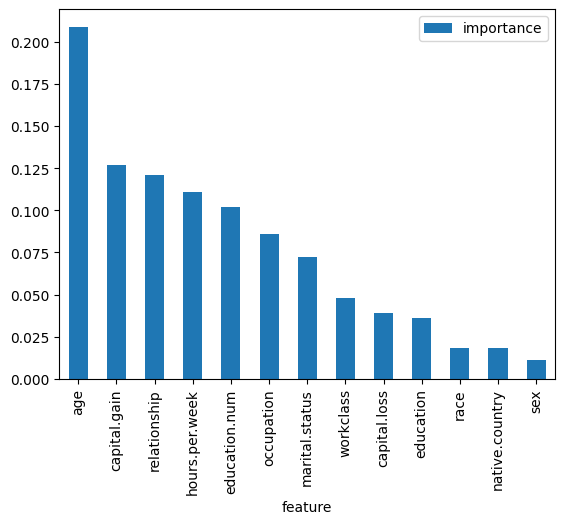

In [66]:
importances.plot.bar()

In [67]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)
test_accuracy = round(accuracy_score(Y_test, Y_prediction) * 100, 2)

print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Training Accuracy: 98.05%
Test Accuracy: 84.95%


In [68]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [69]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.06 %


In [70]:
X_train

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.392980,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.392980,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,3.763293,1.703439,1.217715,-0.034095,-0.402341,-0.530388,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
22788,-0.191461,-0.090641,0.184396,-0.423425,-0.402341,1.736225,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317
22789,-0.923823,-0.090641,-2.140570,-0.812755,0.926666,1.232533,0.346032,-1.963453,0.699071,-0.145189,-0.217407,0.854891,0.262317
22790,0.394429,-0.090641,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.392980,0.699071,-0.145189,-0.217407,-0.038346,0.262317


Training Accuracy: 98.05%
Test Accuracy: 84.95%

Confusion Matrix:
 [[6836  574]
 [ 907 1452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7410
           1       0.72      0.62      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



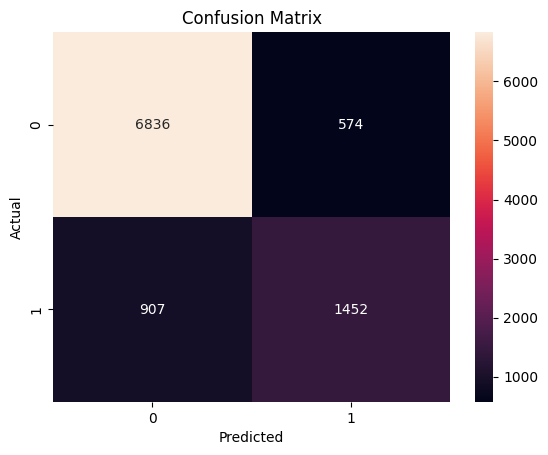

In [71]:
print(f"Training Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")
conf_mat=confusion_matrix(Y_test, Y_prediction)
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_prediction))
print("\nClassification Report:\n", classification_report(Y_test, Y_prediction))

In [72]:
import pickle
model_data={"model":random_forest,"Features_names":X_train.columns.tolist()}
with open("emp_sal_pred_model","wb") as f:
    pickle.dump(model_data,f)

In [73]:
with open("emp_sal_pred_model","rb") as f:
    model_data=pickle.load(f)
loaded_model=model_data["model"]
Features_names=model_data["Features_names"]

In [74]:
print(Features_names)

['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']


In [78]:
import pandas as pd
import pickle
import joblib

# Step 1: Define input data
input_data = {
    'age': 82,
    'workclass': 'Private',
    'education': 'HS-grad',
    'education.num': 9,
    'marital.status': 'Widowed',
    'occupation': 'Exec-managerial',
    'relationship': 'Not-in-family',
    'race': 'White',
    'sex': 'Female',
    'capital.gain': 0,
    'capital.loss': 4356,
    'hours.per.week': 18,
    'native.country': 'United-States'
}

input_data_df = pd.DataFrame([input_data])

# Step 2: Load encoders and transform input
with open("encoders_salary.pkl", "rb") as f:
    encoders = pickle.load(f)

# Apply encoders to the categorical columns
for column, encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])

# Step 3: Load saved model and features
with open("emp_sal_pred_model", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
Features_names = model_data["Features_names"]

# Step 4: Load and apply StandardScaler
with open("scaler_salary.pkl", "rb") as f:
    scaler = pickle.load(f)

input_data_df = input_data_df[Features_names]  # Ensure correct column order
input_data_df = pd.DataFrame(scaler.transform(input_data_df), columns=Features_names)

# Step 5: Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Step 6: Print results
print("Prediction:", prediction[0])
print(f"Prediction: {'High Salary' if prediction[0] == 1 else 'Low Salary'}")
print(f"Prediction Probability: {pred_prob}")


Prediction: 0
Prediction: Low Salary
Prediction Probability: [[0.84 0.16]]
